In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-specifications-dataset-2025/electric_vehicles_spec_2025.csv.csv


In [2]:
df = pd.read_csv("/kaggle/input/electric-vehicle-specifications-dataset-2025/electric_vehicles_spec_2025.csv.csv")
df = df.dropna()
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
6,Alfa,Romeo Junior Elettrica 54 kWh,150,50.8,Lithium-ion,102.0,260.0,128,320,9.0,...,0.0,400,5,FWD,JB - Compact,4173,1781,1532,SUV,https://ev-database.org/car/2184/Alfa-Romeo-Ju...


In [3]:
df.describe()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,184.234848,73.669697,344.159091,518.325758,161.803030,393.219697,6.939394,130.250000,953.359848,5.333333,4665.064394,1885.356061,1597.359848
std,34.359840,19.302654,696.590991,250.086099,31.345721,102.570819,2.889689,60.413452,749.690148,1.131416,367.445316,75.659647,136.715196
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,3631.000000,1622.000000,1378.000000
25%,160.000000,60.000000,157.500000,310.000000,141.000000,320.000000,4.700000,85.000000,0.000000,5.000000,4468.000000,1852.000000,1509.000000
50%,180.000000,77.000000,216.000000,491.500000,156.000000,405.000000,6.600000,120.000000,1000.000000,5.000000,4713.000000,1881.000000,1590.000000
75%,201.000000,90.600000,324.000000,686.000000,178.000000,470.000000,8.700000,150.000000,1500.000000,5.000000,4961.000000,1939.000000,1633.500000
max,305.000000,116.000000,6600.000000,1340.000000,282.000000,665.000000,19.100000,281.000000,2500.000000,9.000000,5370.000000,2011.000000,1986.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 0 to 470
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      264 non-null    object 
 1   model                      264 non-null    object 
 2   top_speed_kmh              264 non-null    int64  
 3   battery_capacity_kWh       264 non-null    float64
 4   battery_type               264 non-null    object 
 5   number_of_cells            264 non-null    float64
 6   torque_nm                  264 non-null    float64
 7   efficiency_wh_per_km       264 non-null    int64  
 8   range_km                   264 non-null    int64  
 9   acceleration_0_100_s       264 non-null    float64
 10  fast_charging_power_kw_dc  264 non-null    float64
 11  fast_charge_port           264 non-null    object 
 12  towing_capacity_kg         264 non-null    float64
 13  cargo_volume_l             264 non-null    object 
 14 

Questions I need answered:
* Range of top speed between brands
* More Battery Capacity = more acceleration?
* Bar Graph of brand vs. avg top speed
* Histogram of towing capacity of mercedes
* Range vs. Efficiency of vehicles (scatter plot)

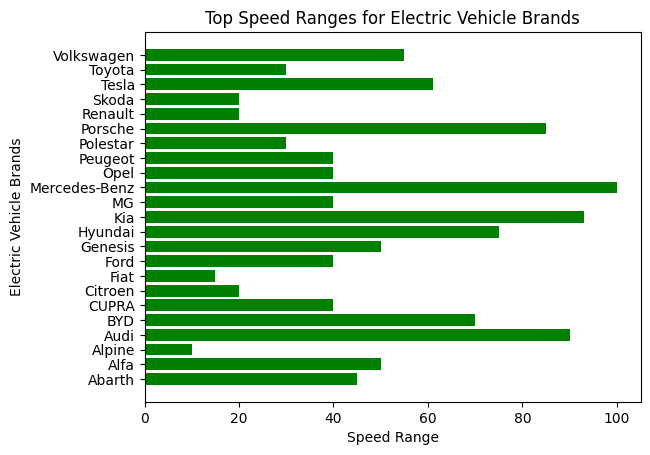

In [5]:
# Range of top speeds between brands
brands = df["brand"].unique()

master_brand_data = []

for brand in brands:
    max_top_speed = np.max(df[df["brand"] == brand]["top_speed_kmh"])
    min_top_speed = np.min(df[df["brand"] == brand]["top_speed_kmh"])
    if max_top_speed == min_top_speed:
        continue
    master_brand_data.append([brand, max_top_speed - min_top_speed])

plt.barh([data[0] for data in master_brand_data], [data[1] for data in master_brand_data], color='green')
plt.title("Top Speed Ranges for Electric Vehicle Brands")
plt.xlabel("Speed Range")
plt.ylabel("Electric Vehicle Brands")
plt.show()

Text(0.5, 1.0, 'Energy Efficiency vs. Acceleration')

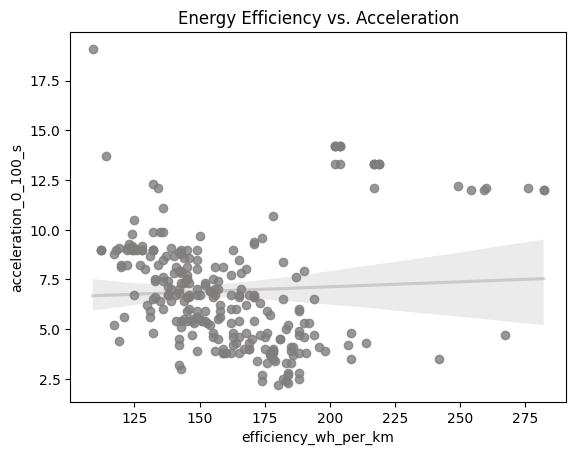

In [6]:
# Investigating if more battery capacity leads to more acceleration
sns.regplot(x=df["efficiency_wh_per_km"], y=df["acceleration_0_100_s"], line_kws={'alpha':0.3}, color='#807d7d')
plt.title("Energy Efficiency vs. Acceleration")

0.0 26.25


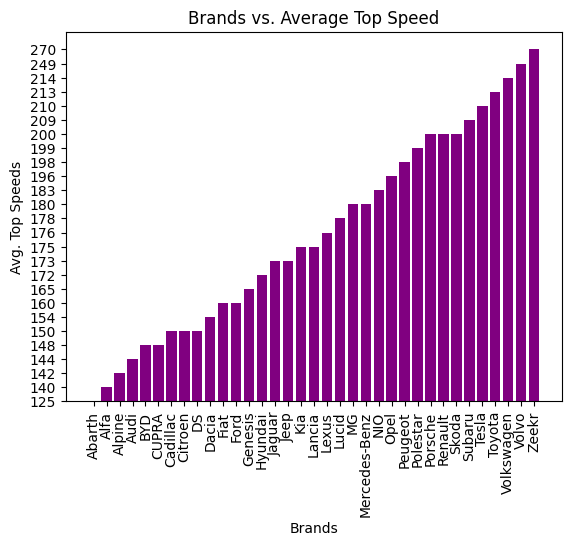

In [7]:
# Brands and their Average Top Speeds

avg_top_speed_data = []

for brand in brands:
    avg_top_speed = round(np.mean(df[df['brand'] == brand]["top_speed_kmh"]))
    avg_top_speed_data.append([brand, avg_top_speed])

avg_top_speed_data = np.sort(avg_top_speed_data, axis=0)

plt.bar([data[0] for data in avg_top_speed_data], [data[1] for data in avg_top_speed_data], color='purple')
plt.xticks(rotation=90)

ymin, ymax = plt.ylim()
print(ymin, ymax)
# plt.yticks(np.arange(ymin, ymax+1, 50))
plt.title("Brands vs. Average Top Speed")
plt.xlabel("Brands")
plt.ylabel("Avg. Top Speeds")
plt.show()